In [8]:
# import neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [9]:
# for building the machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# pipeline
from sklearn.pipeline import Pipeline

# for scaling dataset
from sklearn.preprocessing import StandardScaler

# for encoding categorical data
from sklearn.preprocessing import LabelEncoder

# for cross validation and hyperparameter tunning
from sklearn.model_selection import GridSearchCV

# fro splitting data
from sklearn.model_selection import train_test_split

# fro evalation metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, make_scorer

# from google.colab import files

* get data
* combine data
* data visualization
* Simple EDA and an example of feature enginnering
* data preprocessing and data wrangling
* building model
* hyperparameter tunning and cross validation
* create data for submission make submission
* improve score

In [10]:
# load dataset

train = pd.read_csv('~/Documents/personal/financial-inclusion-in-africa/Train.csv')
testd = pd.read_csv('~/Documents/personal/financial-inclusion-in-africa/Test.csv')
ss = pd.read_csv('~/Documents/personal/financial-inclusion-in-africa/SampleSubmission.csv')
variables = pd.read_csv('~/Documents/personal/financial-inclusion-in-africa/VariableDefinitions.csv')

In [11]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [12]:
testd.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [13]:
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [14]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [15]:
print(f'shape of train data : {train.shape}\nshape of test data : {testd.shape}')

shape of train data : (23524, 13)
shape of test data : (10086, 12)


In [16]:
all_data = pd.concat((train,testd)).reset_index(drop=True)
all_data.head()
all_data.to_csv('all_data.csv')

In [17]:
all_data.shape

(33610, 13)

In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           33610 non-null  object
 5   cellphone_access        33610 non-null  object
 6   household_size          33610 non-null  int64 
 7   age_of_respondent       33610 non-null  int64 
 8   gender_of_respondent    33610 non-null  object
 9   relationship_with_head  33610 non-null  object
 10  marital_status          33610 non-null  object
 11  education_level         33610 non-null  object
 12  job_type                33610 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.3+ MB


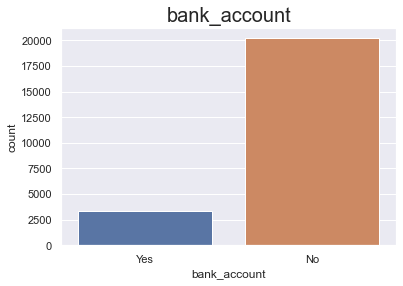

In [19]:
sns.countplot(all_data.bank_account, data=all_data)
plt.title('bank_account', fontdict={'size':20});

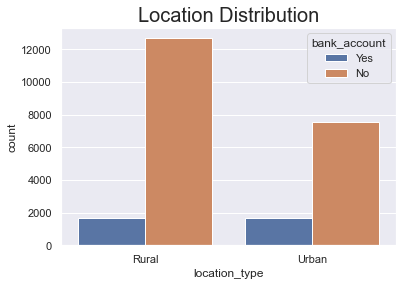

In [20]:
sns.countplot(all_data.location_type,hue=all_data.bank_account, data=all_data)
plt.title('Location Distribution', fontdict={'size':20});

<AxesSubplot:xlabel='country', ylabel='count'>

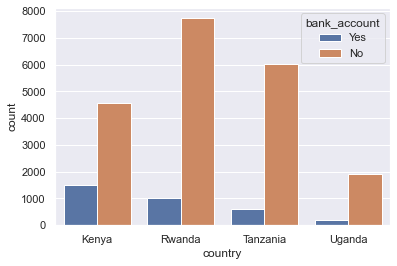

In [21]:
sns.countplot(all_data.country,hue=all_data.bank_account, data=all_data)

<AxesSubplot:xlabel='household_size', ylabel='count'>

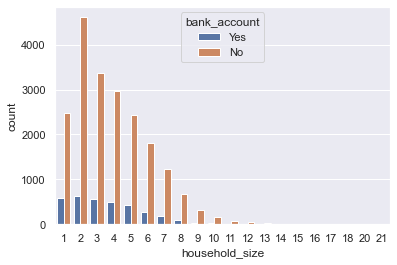

In [22]:
sns.countplot(all_data.household_size,hue=all_data.bank_account, data=all_data)

<AxesSubplot:xlabel='gender_of_respondent', ylabel='count'>

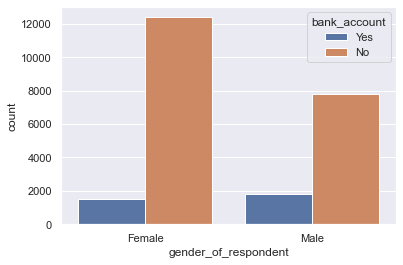

In [23]:
sns.countplot(all_data.gender_of_respondent,hue=all_data.bank_account, data=all_data)

In [24]:
# Check unique values for each categorical column
cat_cols = ['country','location_type','cellphone_access','household_size','age_of_respondent','gender_of_respondent','relationship_with_head','marital_status','education_level','job_type']
# cat_cols = ['country',	'location_type',	'cellphone_access',	'gender_of_respondent',	'relationship_with_head', 'marital_status', 'education_level',	'job_type']
for col in cat_cols:
  print(col)
  print(all_data[col].unique(), '\n')

country
['Kenya' 'Rwanda' 'Tanzania' 'Uganda'] 

location_type
['Rural' 'Urban'] 

cellphone_access
['Yes' 'No'] 

household_size
[ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20] 

age_of_respondent
[ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100] 

gender_of_respondent
['Female' 'Male'] 

relationship_with_head
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives'] 

marital_status
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know'] 

education_level
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA'] 

job_type
['

In [25]:
# all_data['bank_account'] = LabelEncoder().fit_transform(all_data['bank_account'])
# all_data = pd.get_dummies(data = all_data, columns = cat_cols)
# all_data.head()

In [26]:
ntrain = train.shape[0]

In [27]:
# train = all_data[:ntrain]
# test = all_data[ntrain:]

In [28]:
# print(f'shape of train data : {train.shape}\nshape of test data : {test.shape}')

In [29]:
le = LabelEncoder()

all_data['country'] = le.fit_transform(all_data['country'])
all_data['location_type'] = le.fit_transform(all_data['location_type'])
all_data['cellphone_access'] = le.fit_transform(all_data['cellphone_access'])
all_data['household_size'] = le.fit_transform(all_data['household_size'])
all_data['gender_of_respondent'] = le.fit_transform(all_data['gender_of_respondent'])
all_data['relationship_with_head'] = le.fit_transform(all_data['relationship_with_head'])
all_data['marital_status'] = le.fit_transform(all_data['marital_status'])
all_data['education_level'] = le.fit_transform(all_data['education_level'])
all_data['job_type'] = le.fit_transform(all_data['job_type'])
all_data['bank_account'] = LabelEncoder().fit_transform(all_data['bank_account'])

In [30]:
all_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,1,0,1,2,24,0,5,2,3,9
1,0,2018,uniqueid_2,0,0,0,4,70,0,1,4,0,4
2,0,2018,uniqueid_3,1,1,1,4,26,1,3,3,5,9
3,0,2018,uniqueid_4,0,0,1,4,34,0,1,2,2,3
4,0,2018,uniqueid_5,0,1,0,7,26,1,0,3,2,5


In [31]:
all_data.shape

(33610, 13)

In [32]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [66]:
main_data = all_data.columns.difference(['year', 'uniqueid', 'bank_account'])
X_tr = train[main_data]
y = pd.DataFrame(train['bank_account'])

# pd.crosstab(y['bank_account'], y['bank_account'], normalize='all') * 100

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_tr, y = oversample.fit_resample(X_tr, y)

pd.crosstab(y['bank_account'], y['bank_account'], normalize='all') * 100

bank_account,0,1
bank_account,,
0,50.0,0.0
1,0.0,50.0


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X_tr, y, test_size = 0.3, random_state=100)

In [35]:
# main_data = all_data.columns.difference(['year', 'uniqueid', 'bank_account'])
# X_tr = train[main_data]
# y = train['bank_account']

# X_train,X_test,y_train,y_test = train_test_split(X_tr, y, test_size = 0.3, random_state=100)

In [36]:
# rf = RandomForestClassifier(random_state=1000, class_weight='balanced_subsample')

# pipe = Pipeline([
#     ('scale' , StandardScaler()),
#     ('model' , RandomForestClassifier(random_state=1000, class_weight='balanced_subsample'))
# ])

In [37]:
pipelgb = Pipeline([
    ('scale' , StandardScaler()),
    ('model' , LGBMClassifier())
])

In [39]:
y_pred = pipelgb.fit(X_train, y_train).predict(X_test)

In [40]:
# model = GridSearchCV(
#     estimator = pipe,
#     param_grid = {
#         'model__n_estimators':[100], 'model__criterion':['entropy','gini'],
#         'model__max_features':['log2'], 'model__max_depth':[10]
#     },
#     scoring = {'precision' : make_scorer(precision_score),
#                'recall' : make_scorer(recall_score),
#                'f1_score' : make_scorer(f1_score),
#                'accuracy' : make_scorer(accuracy_score)},
#     refit = 'precision', 
#     verbose=2,
#     cv = 5,
#     n_jobs = -1
# )

# y_pred = model.fit(X_train, y_train).predict(X_test)

In [41]:
# model.best_params_

In [42]:
# model.best_estimator_

In [43]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [44]:
# pd.DataFrame(model.cv_results_)

In [45]:
# plt.figure(figsize=(12,4))
# df = pd.DataFrame(model.cv_results_)
# for score in ['mean_test_precision',"mean_test_recall"]:
#     plt.plot([b for b in df['param_model__criterion']],df[score],label=score)
# plt.legend()

In [46]:
accuracy_score(y_pred,y_test)
# f1_score(y_pred,y_test)

0.8227242744063324

In [47]:
X_te = test[main_data]

In [50]:
pred = pipelgb.predict(X_te)
ypred = pd.Series(pred)
ypred

0        1
1        1
2        1
3        0
4        0
        ..
10081    0
10082    0
10083    0
10084    0
10085    0
Length: 10086, dtype: int32

In [51]:
data = pd.DataFrame()
data['Unique_Id'] = testd['uniqueid'] + " x " + testd['country']
data['Bank_account'] = ypred
data.to_csv('bank_account.csv',index=False)

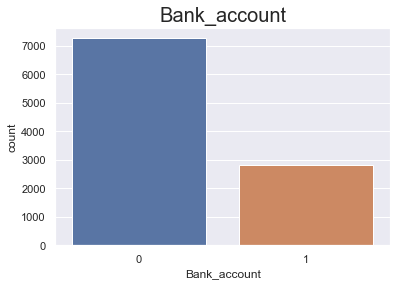

In [52]:
all_ = pd.read_csv('~/Documents/personal/bank_account.csv')
sns.countplot(all_.Bank_account, data=all_)
plt.title('Bank_account', fontdict={'size':20});